<center><img
             src=https://bellabeat.com/wp-content/uploads/2020/10/bb_31.jpg </center>
<h4><span style="color:#E8937D">How Can a Wellness Technology Company Play It Smart?</span></h4></center> 
    
# <span style="color:#E8937D"> Table of Contents </span>
* [1. About](#section-1)
* [2. Ask](#section-2)
 *    [2.1 Business](#subsection-2-1)
 *    [2.1 key Stakeholders](#subsection-2-2)
* [3. Prepare](#section-3)
    * [3.1 Dataset](#subsection-3-1)
    * [3.2 Dataset Summary](#subsection-3-2)
* [4. Process](#section-4)
    * [4.1 Loading Libraries](#subsection-4-1)
    * [4.2 Loading Datasets](#subsection-4-2)
    * [4.2 Viewing the Data](#subsection-4-3)
    * [4.2 Cleaning the Data](#subsection-4-4)
* [5. Analyze ](#section-5)
    * [5.1 Calories Burned per Total Steps](#subsection-5.1)
    * [5.2 Intensity per Hour ](#subsection-5.2)
    * [5.3 Steps](#subsection-5.3)
* [5. Share and Act ](#section-6)
* [7. Citation](#section-7)




<a id="section-1"></a>
# <span style="color:#E8937D"> About </span>

Bellabeat is a small successful company manufacturing smart technology for women. They have the potential to become a larger player in the
global smart device market. This case study will analyze wearable smart technology and find trends that could help bellabeat grow. 


<a id="section-2"></a>
# <span style="color:#E8937D"> Ask </span>

<a id="#subsection-2-1"></a>
### <span style="color:#E8937D"> Business Task </span>
Identify trends in how non-Bellabeat smart devices are used in order to provide insight and high-level recomendations for Bellabeat’s marketing strategy. 

<a id="#subsection-2-2"></a>
### <span style="color:#E8937D"> Key Stakeholders </span>
The key stakeholders for this project are 
   * Urška Sršen, Bellabeat’s co-founder and Chief Creative Officer
   * Sando Mur, Mathematician and Bellabeat’s cofounder
   * Bellabeat marketing analytics team.

<a id="section-3"></a>
# <span style="color:#E8937D"> Prepare </span>

<a id="#subsection-3-1"></a>
### <span style="color:#E8937D"> Dataset </span>

   The data set used is FitBit Fitness Tracker Data. This is a CC0 Public Domain(no rights reserved) dataset made available by user Mobius on Kaggle.
These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.Available are 18 CSV files containing data on the above. See below for summaries of files. I used Google Sheets to open the data sets and check the date range and the number of users. There are some issues with this dataset. One is that it only includes data from 30 users, that is a very small sample size to make any conclusions from. We also do not know any sort of demographic information about the users. As Bellabeats focus is women,it would usefully to know if our data was for women or men. However, this analyst can provide a starting point for further analysis.

<a id="#subsection-3-2"></a>
### <span style="color:#E8937D"> Dataset Summary </span>

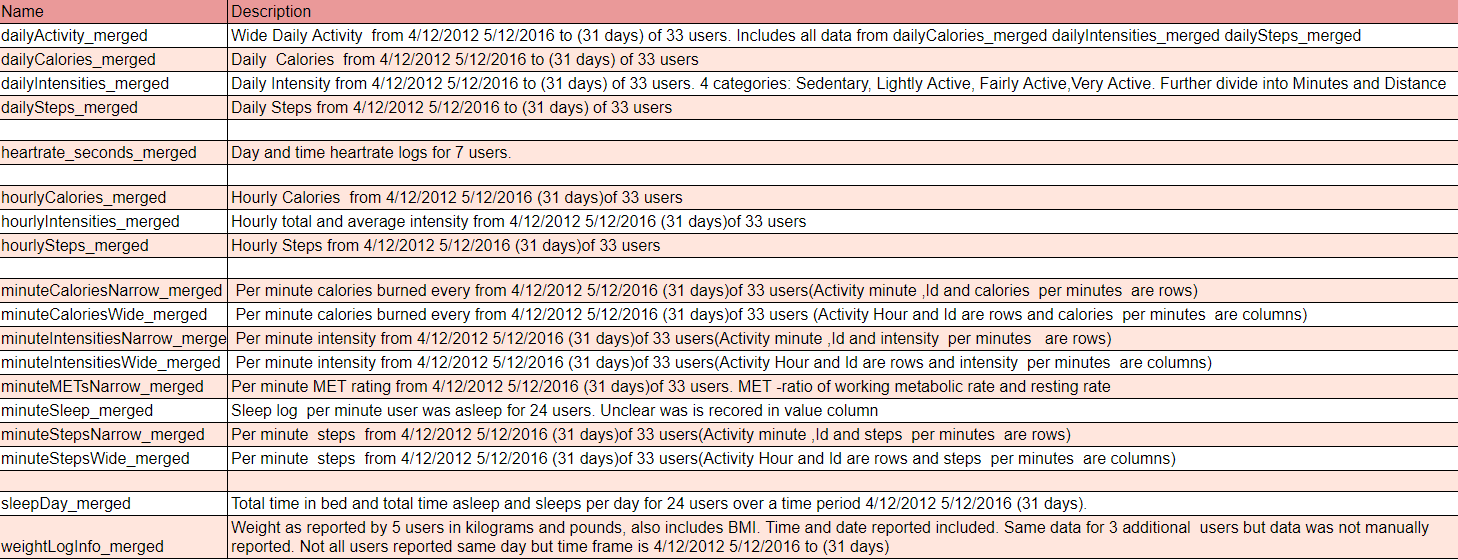


<a id="section-4"></a> 
# <span style="color:#E8937D"> Process </span>

<a id="#subsection-4-1"></a>
### <span style="color:#E8937D"> Loading Libraries </span>


In [ ]:

library(ggplot2)
library(tidyverse)
library(dplyr)
library(lubridate)
library(janitor)
library(scales)   # percentage



<a id="#subsection-4-2"></a>
### <span style="color:#E8937D"> Loading Datasets </span>

Because of the small sample size of weightLogInfo_merged, heartrate_seconds_merged and  sleepDay_merged I will not be including them in this analysis. Good practice is to have at a minimum sample size of 30. 
* dailyActivity_merged which includes the data from
    * dailyCalories_merged
    * dailyIntensities_merged
    * dailySteps_merged
* hourlyCalories_merged
* hourlyIntensities_merged
* hourlySteps_merged


In [ ]:

daily_Activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
hourly_Steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_Calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_Intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")


<a id="#subsection-4-3"></a>
### <span style="color:#E8937D"> Vewing the Data </span>

Using str() we are able to view the column names and column data types


In [ ]:
str(daily_Activity)
str(hourly_Steps)
str(hourly_Calories)
str(hourly_Intensities)

<a id="#subsection-4-4"></a>
### <span style="color:#E8937D"> Cleaning the Data </span>

I would like to make sure my data sets have the right amount of entries and the Ids of 33 users. I will also creat a variable to hold the number of users incase I need it later.

In [ ]:
n_distinct(daily_Activity$Id)
n_distinct(hourly_Steps$Id)
n_distinct(hourly_Calories$Id)
n_distinct(hourly_Intensities$Id)
number_Of_Users <- n_distinct(hourly_Intensities$Id)

Earlier when we were looking at the data I could see that the ActivityDay and ActivityHour columns are formatted as chars and but we would like them to be in the datetime format.

In [ ]:
daily_Activity <- daily_Activity %>% 
  mutate(ActivityDate = as.Date(ActivityDate, format = "%m/%d/%y"))
head(daily_Activity)

hourly_Steps<- hourly_Steps %>% 
 mutate(ActivityHour = as.POSIXct(ActivityHour,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(hourly_Steps)

hourly_Calories<- hourly_Calories %>% 
 mutate(ActivityHour = as.POSIXct(ActivityHour,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(hourly_Calories)

hourly_Intensities<- hourly_Intensities %>% 
 mutate(ActivityHour = as.POSIXct(ActivityHour,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(hourly_Intensities)

We can see that the  hourly datasets all have the same datetime and ID so we can merge them into one data set. 

In [ ]:
hourly_Steps_Intensities <- merge(hourly_Steps,hourly_Intensities, by=c ("Id", "ActivityHour"))
hourly_Activity <- merge(hourly_Steps_Intensities, hourly_Calories, by=c ("Id", "ActivityHour"))


I would like the Activity Hour be split into date and time for analysis

In [ ]:
hourly_Activity $ActivityTime <- format(hourly_Activity $ActivityHour, format = "%H:%M:%S")
hourly_Activity $ActivityDate <- format(hourly_Activity $ActivityHour, format = "%m/%d/%y")
head(hourly_Activity)

<a id="section-5"></a>
# <span style="color:#E8937D"> Analyze</span>
<a id="#subsection-5-1"></a>
### <span style="color:#E8937D"> Calories Burned per Total Steps </span>


Setting up a custom Theme for the charts

In [ ]:
custom_theme <- function() {
  theme(
    panel.background = element_rect(fill = "white", 
                                    color = 'grey50'),
    panel.grid.minor.y = element_blank(),
    axis.text = element_text(colour = "black", 
                             face = "bold"),
    axis.ticks = element_line(colour = "#E8937D"),
    plot.title = element_text(colour = "#E8937D",
                              size=24)   
  )
}

In [ ]:

daily_Activity %>%
  group_by(TotalSteps,Calories) %>%
  ggplot(aes(x = TotalSteps, y = Calories))+
  geom_point() +
  geom_smooth() +
  custom_theme() +
labs(title = 'Calories burned per Steps a Day',
      x = 'Total Steps',
      y = 'Calories',)

In [ ]:
hourly_Activity %>%
  group_by(StepTotal,Calories) %>%
  ggplot(aes(x = StepTotal, y = Calories)) +
  geom_point() +
  geom_smooth() +
 custom_theme() +
labs(title = 'Calories burned per Steps a hour',
      x = 'Total Steps',
      y = 'Calories',)


Here we compare calories burned per day and per hour in relationship with total steps. As one might think, the relationship shows us that the more steps someone takes, the more calories they burn. In the graph looking at the hour time frame, there is a very even slope in the relationship. In the day time frame there is an even slop until you get into the very high step counts, this could be due to those users participating exercise other than walking. More data would be needed to verify this.

<a id="#subsection-5-2"></a>
### <span style="color:#E8937D"> Intensity per Hour </span>

In [ ]:
hourly_Activity %>%
  group_by(TotalIntensity,ActivityTime) %>%
  ggplot(aes(x = ActivityTime, y =TotalIntensity, fill= ActivityTime)) +
  geom_col() +
 custom_theme() +
  theme(axis.text.x = element_text(angle = 45))+
labs(title = 'Intensity by Hour',
      x = 'Activity Hour',
      y = 'Total Intensity',)

This graph shows that users normally are moving between 05:00 and 22:00 with a spike of activity happening between 17:00 and 19:00. This could relate to people going to work out after work. There is a smaller spike arpund 12:00. This could be people taking walks at lunch More data would be needed to verify these aassumption. 



<a id="#subsection-5-3"></a>
### <span style="color:#E8937D"> Steps</span>

The CDC has found that reaching 8k steps per day is associated with a 51% lower risk for all-cause mortality compared to someone who only reaches 4k steps a day. They also found that reaching 12k steps per day was associated with a 65% lower risk compared with reaching 4k.Theses results are not effected by step intensity.
I want to figure out how many users fall into the step categories of less than 4k, between 4k to 8k, 8k to 12k and more than 12k. First I created a pivot table in Google sheets to find the average daily steps of each user and then imported it as a csv. I then created a new dataframe with the precent of users in the 4 groups and put them in a chart.


In [ ]:
average_Daily_Steps <- read_csv("../input/averagestepsperday/AverageStepsPerDay.csv")

average_Daily_Steps$step_Amount <-average_Daily_Steps %>%
summarise(
step_Amount = factor(case_when(
  (StepAverage >= 8000 & StepAverage < 12000) ~  "8k to 12k",
  (StepAverage <= 4000) ~ "Under 4k",
  (StepAverage > 4000 & StepAverage < 8000) ~ "4k to 8k",
  (StepAverage >= 12000) ~ "Over 12k",
)))


very_Low_Steps <-sum(average_Daily_Steps$step_Amount == 'Under 4k')
low_Steps <-sum(average_Daily_Steps$step_Amount == '4k to 8k')
mid_Steps <- sum(average_Daily_Steps$step_Amount == '8k to 12k')
high_Steps <- sum(average_Daily_Steps$step_Amount == 'Over 12k')

percent_Steps <- data.frame(
  step_Desc = c("Under 4k","4k to 8k","8k to 12k", "Over 12 k"),
  percent_Users = c(round((very_Low_Steps/number_Of_Users),2),round((low_Steps/number_Of_Users),2),
                     round((mid_Steps/number_Of_Users),2),round((high_Steps/number_Of_Users),2))
  )
percent_Steps %>%
  ggplot(aes(x = step_Desc, y= percent_Users,fill=step_Desc))+
  geom_bar(stat = "identity",width=0.5)+
  ggtitle("How many steps users get in a day")+
  scale_y_continuous(labels = scales::percent) +
  xlab("Average Daily Total Steps")+
  ylab("Percent of Users")+
 custom_theme() 
head(percent_Steps)

We can see that only 42% of users get over 8k steps a day. The majority of users are getting between 4k and 8k, with 9% not even hitting the 4k mark. 


<a id="section-6"></a>
# <span style="color:#E8937D"> Share and Act</span>

The data shows the expected result that the more steps someone takes, the more calories they burn. We also have found that 58% users are not getting enought steps in a day. With these two things in mind, I would suggest that Bellabeat implementss a notifcation for the  user to get enough steps. We saw that the amount of steps taken each hour differs, so built into the reminder could be the ability to set a step goal for different hours of the day. There could be a reward system to encourage users to get enough steps. It could consist of hitting your step goal everyday for a set period. Once this was reached, you could get a reward such as a coupon for bellabeat products or another similar company, ie a active-wear clothing business. 


This is my first project using R. Thanks for taking the time to look at it!


<a id="section-7"></a>
# <span style="color:#E8937D"> Citation</span>


<span style="color:#E8937D"> **Original source of Data Set**</span>
Furberg, R., Brinton, J., Keating, M., & Ortiz, A. (2016). Crowd-sourced Fitbit datasets 03.12.2016-05.12.2016 [Data set]. Zenodo. https://doi.org/10.5281/zenodo.53894

<span style="color:#E8937D"> **Kaggle Data set**</span>
Mobius.(2020). FitBit Fitness Tracker Data, [Version of the dataset]. Retrieved 2022-07-05 from https://www.kaggle.com/datasets/arashnic/fitbit?datasetId=1041311&sortBy=voteCount

<span style="color:#E8937D"> **Other**</span>
Centers for Disease Control and Prevention. (2020, March 24). Higher daily step count linked with lower all-cause mortality. Centers for Disease Control and Prevention. Retrieved July 11, 2022, from https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html 

Opening your heart to change never goes out of fashion. Bellabeat. (2022, April 13). Retrieved July 13, 2022, from https://bellabeat.com/uncategorized/opening-your-heart-to-change-never-goes-out-of-fashion/ 


